## Stock Index Constituents Returns Correlations Heatmap
### Using Pandas, Pandas Datareader, and Seaborn

#### First Thing First, load up pandas, seaborn, and the data readers

In [1]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime as dt

import os # for file writing *maybe*

# for ploting we need:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#### Define our index constituents and get the data

[This post](https://medium.com/python-data/how-to-scrape-information-of-s-p-500-listed-companies-with-python-8205f895ee7a) talk a little bit about how to scrap index constituent data

In [162]:
str_index = "^HSI"
str_url = f"https://finance.yahoo.com/quote/{str_index}/components"
data = pd.read_html(str_url)
dsym = data[0].loc[:,['Symbol','Company Name']]
sym_dic = {dsym.loc[i,'Symbol']: dsym.loc[i,'Company Name'] for i in range(len(dsym))}
dsym.head()

,Symbol,Company Name
0,0011.HK,Hang Seng Bank Limited
1,1044.HK,Hengan International Group Company Limited
2,0006.HK,Power Assets Holdings Limited
3,0017.HK,New World Development Company Limited
4,0386.HK,China Petroleum & Chemical Corporation


In [151]:
lsymbols = list( dsym.loc[:,'Symbol'])

def get_sym_name(sym):
    return sym_dic[sym.upper()]


'CLP Holdings Limited'

In [2]:
# lsymbols= [
#     'SPY',
#     'GLD',
#     'EEM',
#     'QQQ',
#     'IWM',
#     'VXX',
#     'USO',
#     'GDX',
#     'MJ',
#     'SH'
# ]

sdate = dt(2017,1,1)
yhoo_df = web.DataReader(lsymbols, 'yahoo',sdate, dt.now())

#### Check out the resulting Data frame

In [138]:
yhoo_df.head()

Attributes       High                                                         \
Symbols       0002.HK  0003.HK    0006.HK     0011.HK    0012.HK     0016.HK   
Date                                                                           
2017-01-03  72.849998  11.5537  68.949997  146.899994  34.875999  101.400002   
2017-01-04  73.449997  11.4215  69.599998  147.300003  34.875999  101.400002   
2017-01-05  74.199997  11.4380  69.550003  148.399994  34.628101  102.599998   
2017-01-06  73.900002  11.5372  69.099998  149.000000  34.710701  103.800003   
2017-01-09  73.800003  11.6033  70.000000  148.800003  34.875999  104.199997   

Attributes                                          ...      Adj Close  \
Symbols    0017.HK    0027.HK 0083.HK    0101.HK    ...        1109.HK   
Date                                                ...                  
2017-01-03    8.54  33.650002   12.00  16.900000    ...      16.517851   
2017-01-04    8.51  33.549999   11.92  17.200001    ...      16.517851   
2017-01-05    8.53  34.200001   12.00  17.080000    ...      16.893259   
2017-01-06    8.53  34.450001   11.98  17.320000    ...      16.987110   
2017-01-09    8.52  35.549999   12.08  17.480000    ...      17.156042   

Attributes                                                                \
Symbols       1299.HK   1398.HK    1928.HK 1997.HK    2018.HK    2318.HK   
Date                                                                       
2017-01-03  42.434986  4.218782  30.373884     NaN  68.134842  37.579697   
2017-01-04  42.240997  4.191739  30.193089     NaN  69.004028  37.484200   
2017-01-05  43.113949  4.245826  30.735479     NaN  71.466736  37.961704   
2017-01-06  43.453430  4.263855  30.419086     NaN  72.432503  37.913952   
2017-01-09  43.986893  4.218782  31.232672     NaN  72.191063  37.913952   

Attributes                                   
Symbols       2319.HK    2388.HK    2628.HK  
Date                                         
2017-01-03  14.878617  26.508429  20.135611  
2017-01-04  14.681026  26.555265  19.942001  
2017-01-05  14.285843  26.976776  20.426031  
2017-01-06  14.364881  26.555265  20.426031  
2017-01-09  14.345121  26.836273  20.329226  

[5 rows x 180 columns]

In [139]:
yhoo_df.dtypes

Attributes  Symbols
High        0002.HK    float64
            0003.HK    float64
            0006.HK    float64
            0011.HK    float64
            0012.HK    float64
            0016.HK    float64
            0017.HK    float64
            0027.HK    float64
            0083.HK    float64
            0101.HK    float64
            0267.HK    float64
            0288.HK    float64
            0386.HK    float64
            0700.HK    float64
            0836.HK    float64
            0883.HK    float64
            0941.HK    float64
            1038.HK    float64
            1044.HK    float64
            1093.HK    float64
            1109.HK    float64
            1299.HK    float64
            1398.HK    float64
            1928.HK    float64
            1997.HK    float64
            2018.HK    float64
            2318.HK    float64
            2319.HK    float64
            2388.HK    float64
            2628.HK    float64
                        ...   
Adj Close   0002.HK

In [6]:
yhoo_df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-10-05', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12', '2018-10-15', '2018-10-16',
               '2018-10-17', '2018-10-18'],
              dtype='datetime64[ns]', name='Date', length=453, freq=None)

#### Let's reshape the data into something easier to work with

In [3]:
df = yhoo_df.stack()
df.head(10)

Attributes                High         Low        Open       Close  \
Date       Symbols                                                   
2017-01-03 EEM       35.650002   35.299999   35.389999   35.430000   
           GDX       21.770000   20.980000   21.070000   21.760000   
           GLD      111.000000  109.370003  109.620003  110.470001   
           IWM      136.830002  134.500000  136.490005  135.520004   
           MJ        24.681999   24.510000   24.510000   24.618000   
           QQQ      119.989998  118.889999  119.269997  119.540001   
           SH        36.490002   36.180000   36.290001   36.290001   
           SPY      225.830002  223.880005  225.039993  225.240005   
           USO       12.000000   11.360000   11.980000   11.440000   
           VXX       98.639999   94.559998   97.919998   94.800003   

Attributes              Volume   Adj Close  
Date       Symbols                          
2017-01-03 EEM      64483700.0   34.514641  
           GDX      83239600.0   21.585840  
           GLD       7527400.0  110.470001  
           IWM      29792400.0  132.576813  
           MJ           1300.0   24.495026  
           QQQ      22307600.0  117.803764  
           SH        2377900.0   35.981636  
           SPY      91366500.0  218.092178  
           USO      36183500.0   11.440000  
           VXX       9778700.0   94.800003

In [4]:
df.reset_index(inplace = True)
df.head(10)

Attributes,Date,Symbols,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,EEM,35.650002,35.299999,35.389999,35.430000,64483700.0,34.514641
1,2017-01-03,GDX,21.770000,20.980000,21.070000,21.760000,83239600.0,21.585840
2,2017-01-03,GLD,111.000000,109.370003,109.620003,110.470001,7527400.0,110.470001
3,2017-01-03,IWM,136.830002,134.500000,136.490005,135.520004,29792400.0,132.576813
4,2017-01-03,MJ,24.681999,24.510000,24.510000,24.618000,1300.0,24.495026
5,2017-01-03,QQQ,119.989998,118.889999,119.269997,119.540001,22307600.0,117.803764
6,2017-01-03,SH,36.490002,36.180000,36.290001,36.290001,2377900.0,35.981636
7,2017-01-03,SPY,225.830002,223.880005,225.039993,225.240005,91366500.0,218.092178
8,2017-01-03,USO,12.000000,11.360000,11.980000,11.440000,36183500.0,11.440000
9,2017-01-03,VXX,98.639999,94.559998,97.919998,94.800003,9778700.0,94.800003


#### Using the data frame of prices, we need a data frame of each stocks' returns
so we need to do the follow:  
1. Create a df of returns for each stock
2. recombine the individual stock returns dfs into one big dataframe where we can run statistical analysis

In [5]:
sample_df = df[df.Symbols=='GLD'].loc[:,['Date','Symbols','Adj Close','Volume']]
sample_df.set_index('Date').index


DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18',
               '2018-10-19', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26'],
              dtype='datetime64[ns]', name='Date', length=459, freq=None)

In [6]:
l_col_to_keep = ['Date','Symbols','Adj Close','Volume']
l_df =[]

# List comprehension won't really work because we are trying to do a couple things for each symbols here
#l_df = [ df[df.Symbols == sym].loc[:, l_col_to_keep ] for sym in lsymbols]

for sym in lsymbols:
    i_df = df[df.Symbols == sym].loc[:, l_col_to_keep]
    i_df = i_df.set_index('Date')
    i_df[f"r({sym})"] = i_df['Adj Close']/ i_df['Adj Close'].shift(1) - 1
    i_df = i_df.dropna() #only the first record should be dropped
    l_df.append(i_df)
    
    # Optional print to double check
    #print(i_df.head(3))

we got each stock's return in the list object **l_df** now.  

Let's recombine them into a return matrix dataframe!

In [7]:
from functools import reduce
return_df = reduce( lambda x,y: pd.concat([x,y], axis=1),
                   [ i_df.iloc[:,-1] for i_df in l_df] )

In [8]:
return_df.head()

,r(SPY),r(GLD),r(EEM),r(QQQ),r(IWM),r(VXX),r(USO),r(GDX),r(MJ),r(SH)
Date,,,,,,,,,,
2017-01-04,0.005949,0.003530,0.007621,0.005437,0.016676,-0.051477,0.012238,0.007353,0.006174,-0.005787
2017-01-05,-0.000795,0.015515,0.010924,0.005658,-0.011540,-0.003559,0.010363,0.058394,0.006459,0.000554
2017-01-06,0.003578,-0.007373,-0.004156,0.008770,-0.003672,-0.012054,-0.001709,-0.034914,0.002006,-0.004432
2017-01-09,-0.003301,0.008233,-0.000835,0.003281,-0.006559,-0.004067,-0.031678,0.003126,0.000000,0.003339
2017-01-10,0.000000,0.004260,0.005848,0.002207,0.009570,-0.006352,-0.021220,0.007124,-0.009688,0.000277


#### Now we do some cool stuff!
Let's plot the returns correlation heat map

[Here](https://seaborn.pydata.org/tutorial/aesthetics.html) is some reference on how to make seaborn look sexier

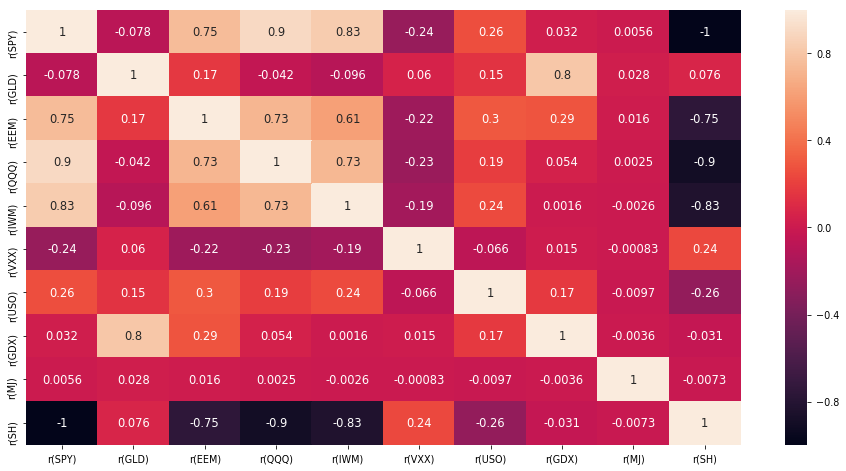

In [9]:
correlation_matrix = return_df.corr()
plt.figure(figsize = (16,8))
sns.set_context("paper", font_scale = 1.2)
sns.heatmap(correlation_matrix,annot=True)

In [159]:
#print(sym_dic)
print(f"{get_sym_name('0016.hk')}, {get_sym_name('0017.hk')}")

Sun Hung Kai Properties Limited, New World Development Company Limited


#### Let's compare two stocks return
[This link](https://sajalsharma.com/portfolio/tech_stock_analysis) got some interesting ideas

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1152x576 with 0 Axes>

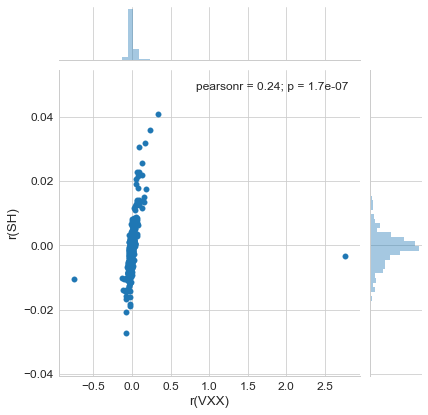

In [14]:
target_syms = ['VXX', 'SH']
sym_keys = [f"r({i})" for i in target_syms]

plt.figure(figsize = (16,8))
sns.set_context("paper", font_scale = 1.5)

reduce(lambda x,y: sns.jointplot(x, y, return_df, kind='scatter'), sym_keys)

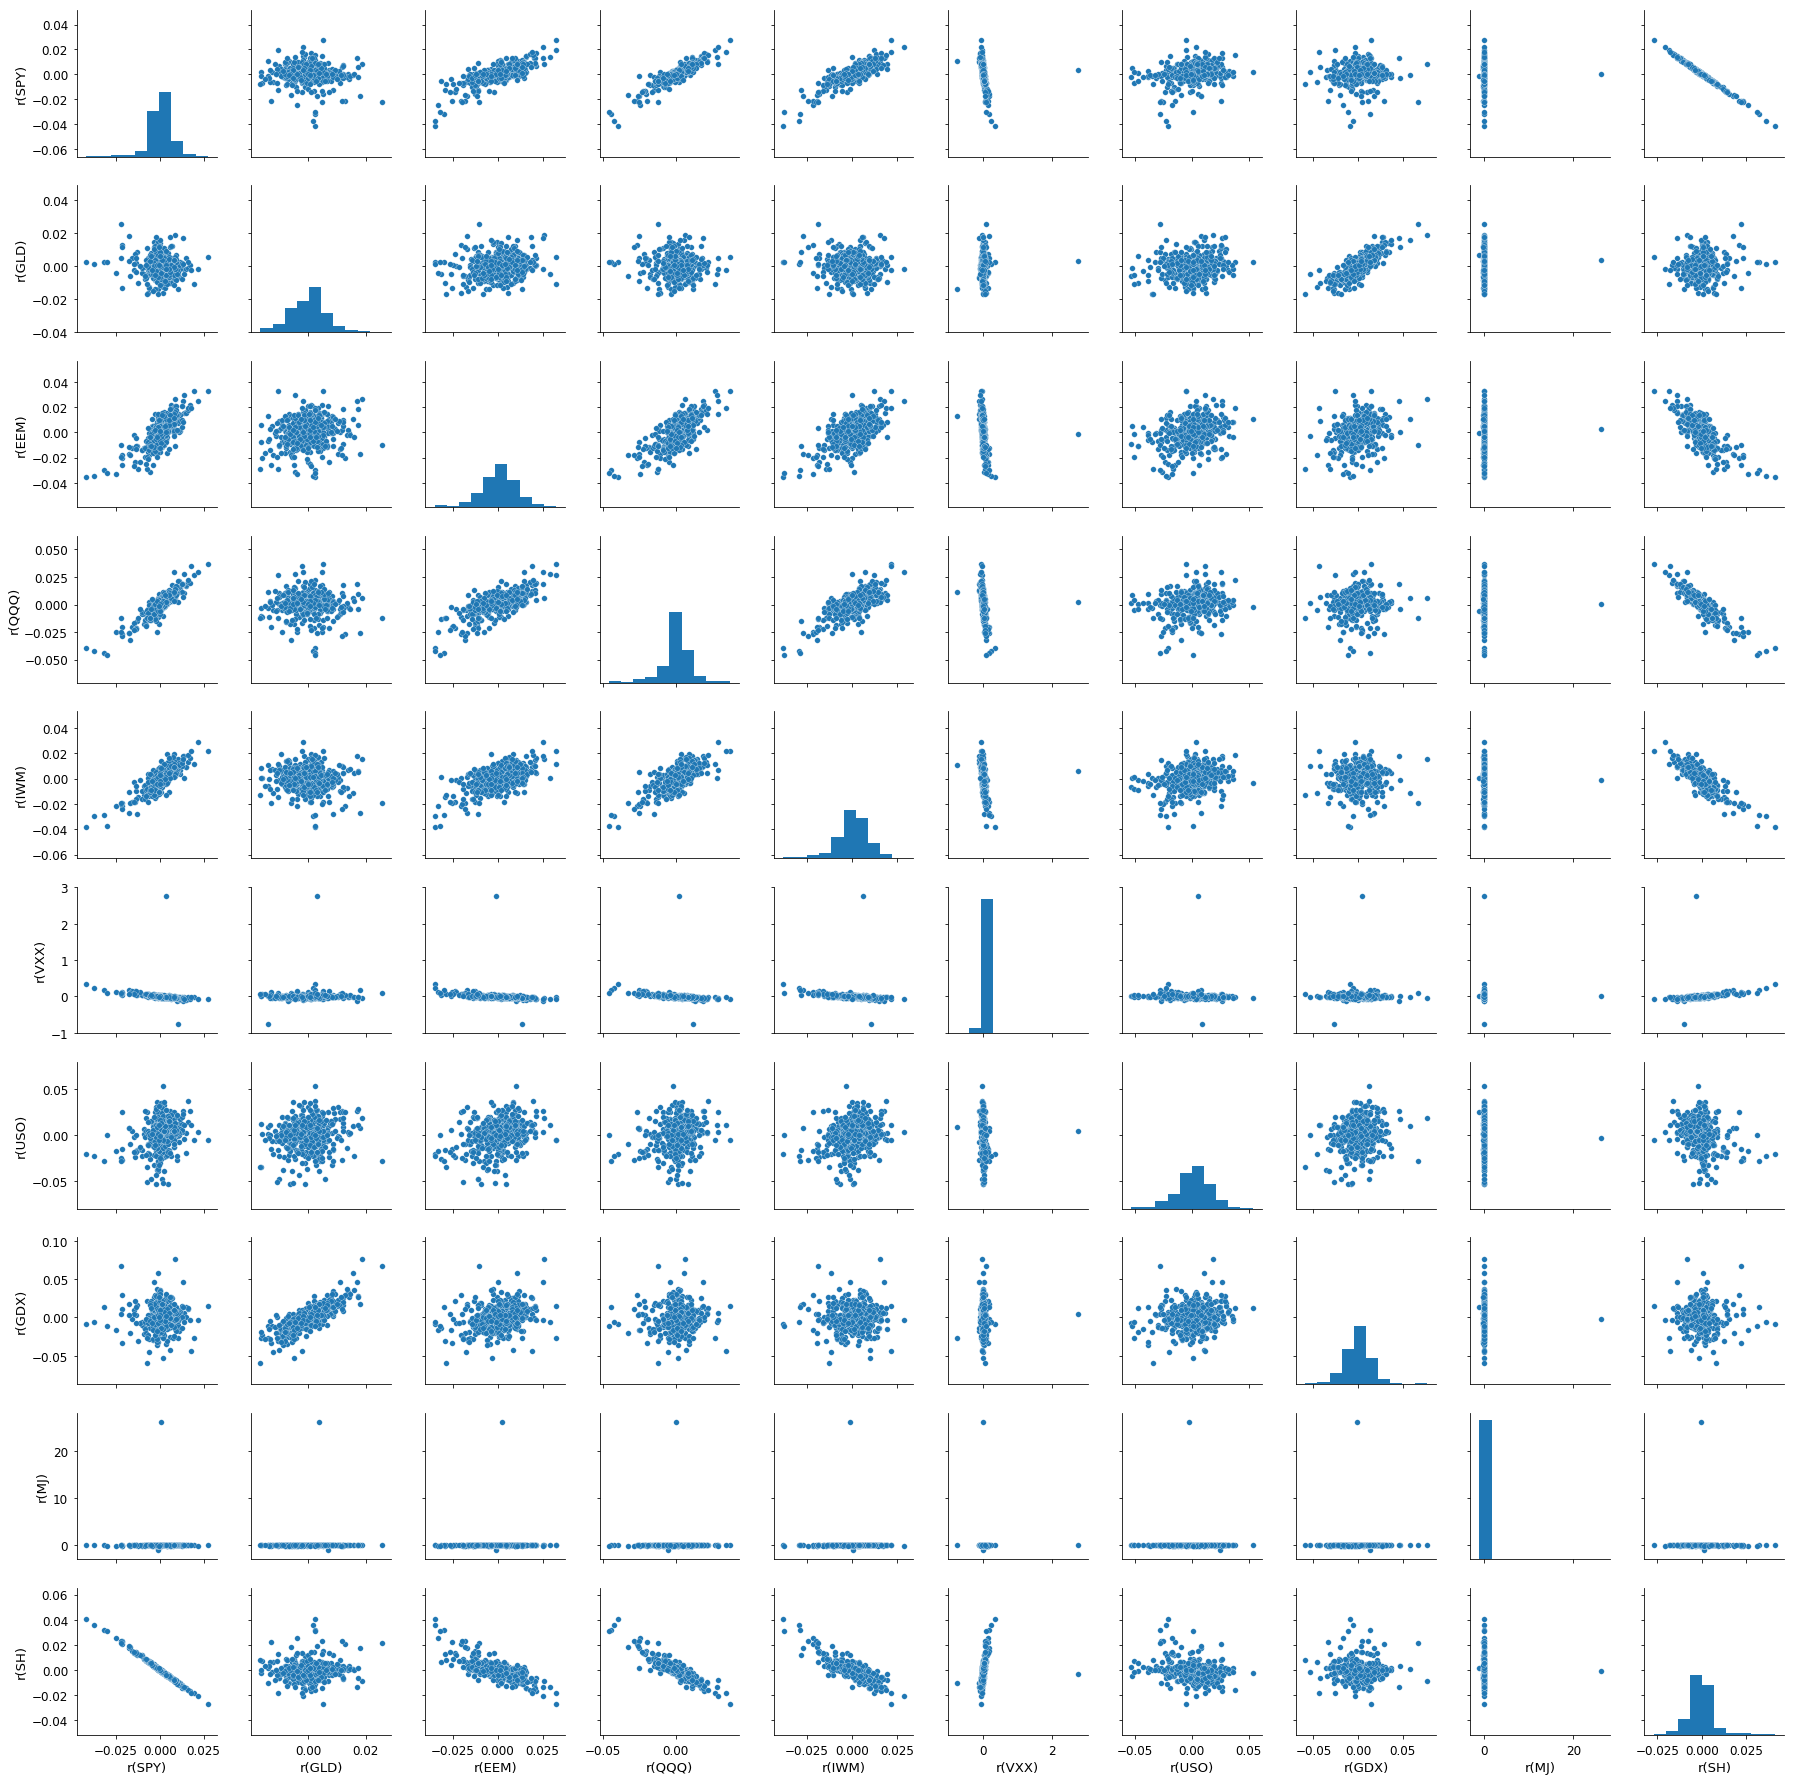

In [11]:
sns.pairplot(return_df)

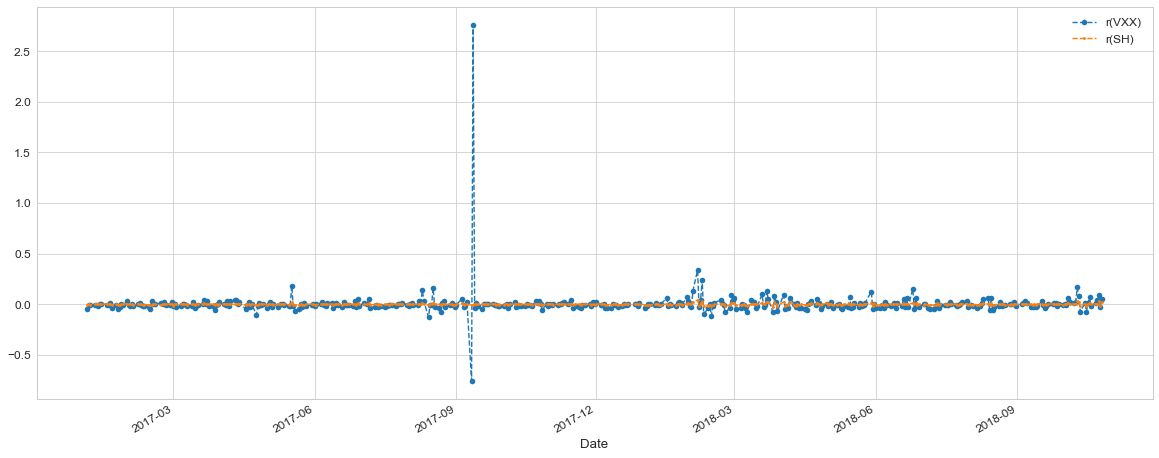

In [16]:
sns.set_style('whitegrid')
return_df[sym_keys].plot(
    subplots= False,
    figsize= (20,8),
    style= ['o--','.--'])

#### Let's plot the difference in Return

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


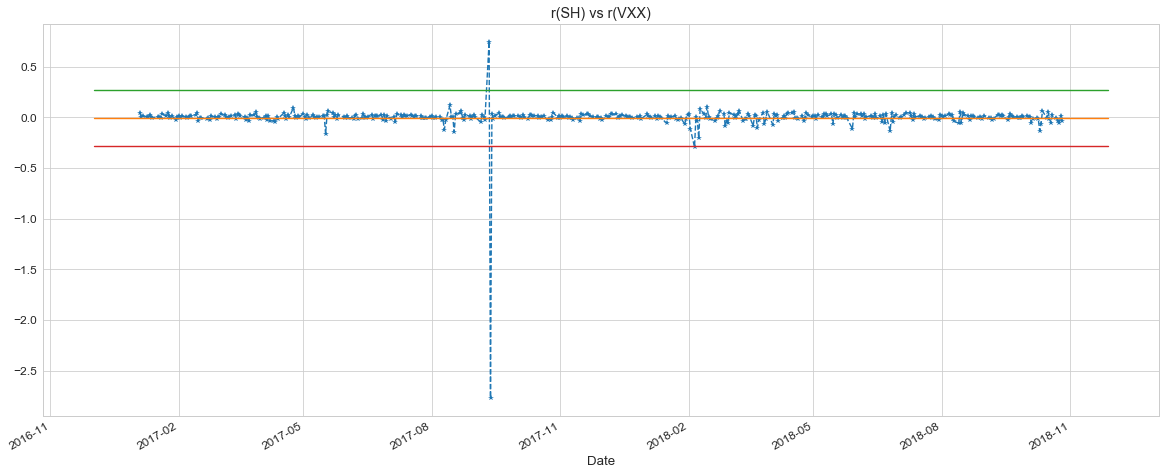

In [15]:
outpref_df = return_df[sym_keys]
outpref_df[ 'r_diff'] = outpref_df.iloc[:,1] - outpref_df.iloc[:,0]
outpref = outpref_df['r_diff']

iAx= outpref.plot(
    figsize=(20,8),
    style = '*--')
iAx.set_title(f'{sym_keys[1]} vs {sym_keys[0]}')

k_of_iAx = [ outpref.mean(), outpref.mean() + 2 * outpref.std(), outpref.mean() -  2 * outpref.std()]
x_lim = iAx.get_xlim()
plot_k =  lambda k: iAx.plot(x_lim,[k, k])
for k in k_of_iAx:
    plot_k(k)

Let's get some stats on these returns

In [117]:
outpref_stats = outpref_df['r_diff'].describe()
print(outpref_stats)

count    452.000000
mean      -0.000177
std        0.010955
min       -0.048615
25%       -0.006413
50%       -0.000521
75%        0.006239
max        0.058186
Name: r_diff, dtype: float64


In [120]:
data = pd.read_html("https://finance.yahoo.com/quote/%5EHSI/components?ltr=1")
data.head()

AttributeError: 'list' object has no attribute 'head'